In [3]:
#Creating fake dataset 
from faker import Faker
fake_data = Faker()

technical_know_how = ['Sharp','Focused','Well-trained','Strategic planners','Bully','Resourceful','Goal oriented','Well-networked','Well-organized','Well trained','Creative','Skilful','Opportunists']

personal_traits = ['Impatient',
'Determined',
'Insensitive',
'Secretive',
'Aggressive',
'Strong-willed' ,
'Passionate ',
'Insensitive',
'Chaotic state of mind'  ,
'Inhuman Psyche',
'Vengeful',
'Coercive',
'Coward',
'Selfish',
'Immoral',
'Risk-taker',
'Loner',
'Incited',
'Gullible',
'Conviction in Violence',
'Emotional',
'Control freak',
'Psychologically Deviant',
'Psychiatric conditions',
'Identity crisis',]

social_characteristics = ['Anti-establishment',
'Lack Social skills',
'Low self-worth',
'Marginalised',
'Radical',
'Mass-destruction',
'Misguided',
'Brain-washed',
'Anti-social',
'Anti-state',
'Unlawful',
'Rebellious',
'Reinforcement available',
'Intolerance to diversity of opinion',
'Need to outsmart others',
'Rationalization',
'Social dissatisfaction',
'Broken homes/families',
'Socially inept',
'Insufficient social support',]

motivating_factors = ['Monetary Gain',
'Greed',
'Political beliefs',
'Emotions',
'Disregard for law',
'Intolerance',
'Thrill-seeking',
'Risk tolerance',
'Manipulate others',
'Need to Control others',
'Concealed existence',
'Political support',
'Religious fundamentalism',
'Experimentation',
'No fear of punishment',
'Curiosity',
'Revenge',
'Anger',
'Lust',
'Plain boredom',
'Enhancing self-worth',]


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [5]:
sampled_technical_know_how = [fake_data.random_element(technical_know_how) for _ in range(100)]
sampled_personal_traits = [fake_data.random_element(personal_traits) for _ in range(100)]
sampled_social_characteristics = [fake_data.random_element(social_characteristics) for _ in range(100)]
sampled_motivating_factors = [fake_data.random_element(motivating_factors) for _ in range(100)]

data = pd.DataFrame(list(zip(sampled_technical_know_how,sampled_personal_traits,sampled_social_characteristics,sampled_motivating_factors)),columns= ['Technical Know How','Personal Traits','Social Characteristics','Motivating factors'])
data.head()

,Technical Know How,Personal Traits,Social Characteristics,Motivating factors
0,Well-trained,Immoral,Mass-destruction,Anger
1,Skilful,Conviction in Violence,Intolerance to diversity of opinion,Curiosity
2,Opportunists,Psychiatric conditions,Broken homes/families,Experimentation
3,Strategic planners,Secretive,Broken homes/families,Concealed existence
4,Well trained,Risk-taker,Unlawful,Religious fundamentalism


In [7]:
le = LabelEncoder()
X_train = pd.DataFrame(columns=['Technical Know How','Personal Traits','Social Characteristics','Motivating factors'])

for column in data.columns:
    X_train[column] = le.fit_transform(data[column])

X_train.head()

,Technical Know How,Personal Traits,Social Characteristics,Motivating factors
0,12,10,10,0
1,7,4,6,2
2,4,17,4,6
3,8,20,4,1
4,9,19,19,17


In [8]:
pca = PCA(n_components=2)
X_train_2 = pca.fit_transform(X_train)
feature_1 = X_train_2[:,0]
feature_2 = X_train_2[:,1]   

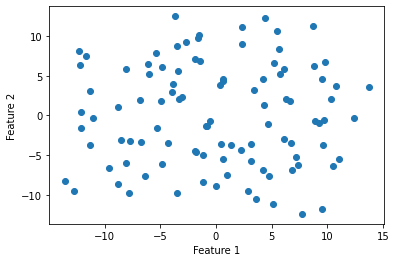

In [9]:
plt.scatter(feature_1, feature_2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

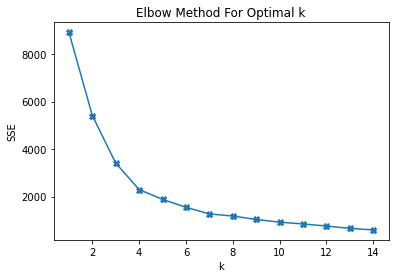

In [10]:
sse = []
kmeans_kwargs = {
    'init':'random',

    'n_init':10,
    'max_iter':300,
    'random_state':42

}
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k,**kmeans_kwargs).fit(X_train_2)
    sse.append(kmeans.inertia_)
  
#Elbow method analysis
plt.plot(K, sse, linestyle = '-',marker='X')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
#Taking k=4 as optimal point
kmeans = KMeans(n_clusters=4,).fit(X_train_2)

In [17]:
kmeans.cluster_centers_

array([[-8.59793138, -4.82407452],
       [ 7.25020124,  4.90374955],
       [-4.68899124,  5.93549662],
       [ 3.58934319, -5.81791889]])

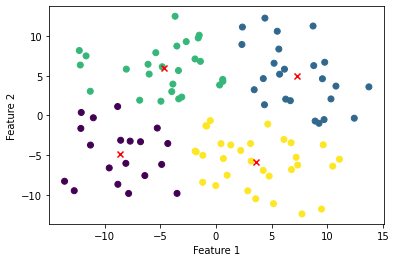

In [18]:
predicted = kmeans.predict(X_train_2)
plt.scatter(feature_1, feature_2,c=predicted)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()